In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [2]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [3]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
print('Accuracy of random-forest classifier:', accuracy_score(y_test, y_pred))

Accuracy of random-forest classifier: 0.9166666666666666


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_dataset(X, y):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'r^')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs')
    plt.xlabel(r'$x1$', fontsize=12)
    plt.ylabel(r'$x2$', rotation=True, fontsize=12)

def plot_prediction(classifier, axes, n_samples=100):
    x0 = np.linspace(axes[0], axes[1], n_samples)
    x1 = np.linspace(axes[2], axes[3], n_samples)
    X0, X1 = np.meshgrid(x0,x1)
    X_new = np.c_[X0.ravel(), X1.ravel()]
    y_pred = classifier.predict(X_new).reshape(X0.shape)
    lemon_lime_cmap = ListedColormap(['#fff44f', '#00ff00'])
    plt.contourf(X0, X1, y_pred, cmap=lemon_lime_cmap, alpha=0.5)

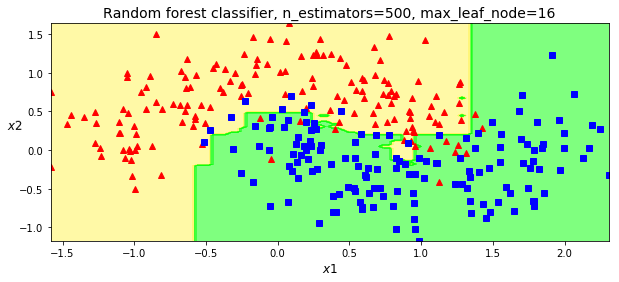

In [5]:
axes = [X_test[:,0].min(), X_test[:,0].max(),
        X_test[:,1].min(), X_test[:,1].max()]

plt.figure(figsize=(10,4))
plt.title('Random forest classifier, n_estimators={}, max_leaf_node={}'.format(500, 16), fontsize=14)
plot_dataset(X_test, y_test)
plot_prediction(rnd_clf, axes)
plt.show()

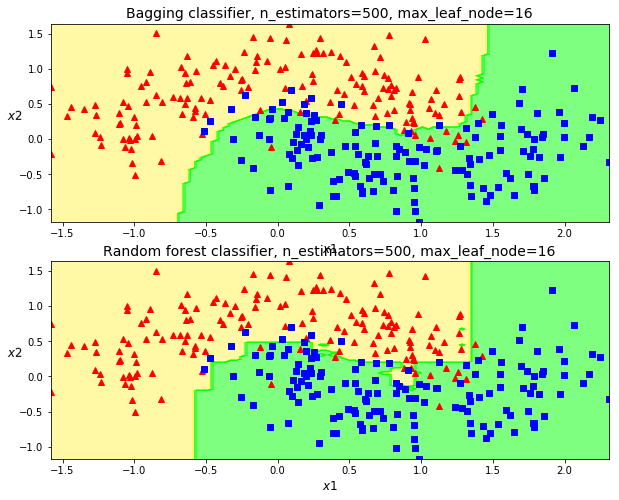

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True,
    n_jobs=-1)
bag_clf.fit(X_train, y_train)

plt.figure(figsize=(10,8))

plt.subplot(211)
plt.title('Bagging classifier, n_estimators={}, max_leaf_node={}'.format(500, 16), fontsize=14)
plot_dataset(X_test, y_test)
plot_prediction(bag_clf, axes)

plt.subplot(212)
plt.title('Random forest classifier, n_estimators={}, max_leaf_node={}'.format(500, 16), fontsize=14)
plot_dataset(X_test, y_test)
plot_prediction(rnd_clf, axes)

plt.show()

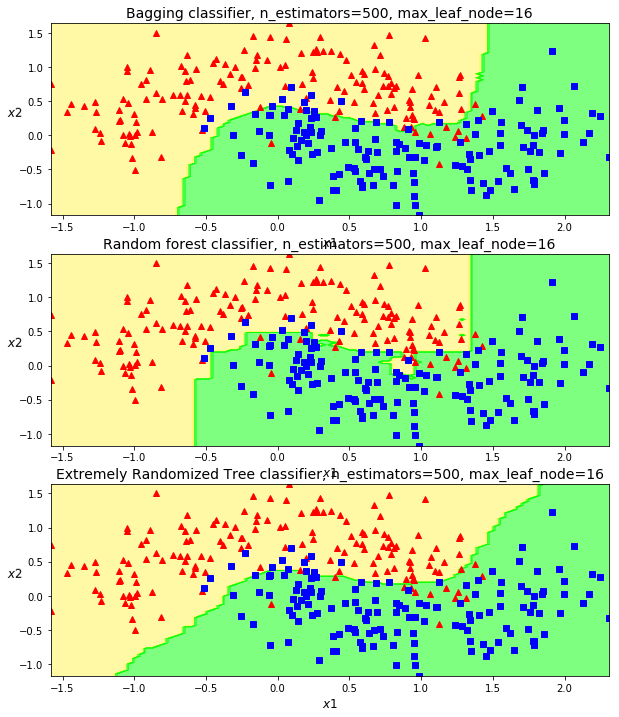

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

# Extremely Randomized Tree
ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_clf.fit(X_train, y_train)

plt.figure(figsize=(10,12))

plt.subplot(311)
plt.title('Bagging classifier, n_estimators={}, max_leaf_node={}'.format(500, 16), fontsize=14)
plot_dataset(X_test, y_test)
plot_prediction(bag_clf, axes)

plt.subplot(312)
plt.title('Random forest classifier, n_estimators={}, max_leaf_node={}'.format(500, 16), fontsize=14)
plot_dataset(X_test, y_test)
plot_prediction(rnd_clf, axes)

plt.subplot(313)
plt.title('Extremely Randomized Tree classifier, n_estimators={}, max_leaf_node={}'.format(500, 16), fontsize=14)
plot_dataset(X_test, y_test)
plot_prediction(ext_clf, axes)

plt.show()